In [31]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import datetime

In [925]:
def get_season(date):
    """
    convert date to month and day as integer (md), e.g. 4/21 = 421, 11/17 = 1117, etc.
    """
    if np.isnan(date.month) == True:
        return 
    else:
        m = date.month * 100
        d = date.day
        md = m + d

        if ((md >= 301) and (md <= 531)):
            s = "spring"  # spring
        elif ((md > 531) and (md < 901)):
            s = "summer"  # summer
        elif ((md >= 901) and (md <= 1130)):
            s = "fall"  # fall
        elif ((md > 1130) or (md <= 231)):
            s = "winter"  # winter
        else:
            None

    return s



In [956]:
#Reading in the data frame

df = pd.read_csv("/Users/albertson/OneDrive - Washington University in St. Louis/OSCM 400/Final/restaurant_history_data.csv",index_col=0)
df["time booked UTC"] = pd.to_datetime(df['time booked UTC'], utc=True)
df["pacific_time_booked"] = df["time booked UTC"].dt.tz_convert("US/Pacific")
df["hour"] = df.apply(lambda row: row["pacific_time_booked"].hour,axis=1)
df["reservation_date"] = pd.to_datetime(df["reservation_date"]).dt.tz_localize("US/Pacific")
df["days_before_booked"] = df.apply(lambda row: (row["reservation_date"] - row["pacific_time_booked"]).days,axis=1)
df["weekday_book"] = df.apply(lambda row: row["pacific_time_booked"].isoweekday(),axis=1)
df["weekday_reservation"] = df.apply(lambda row: row["reservation_date"].isoweekday(),axis=1)
df["season"] = df.apply(lambda row: get_season(row["pacific_time_booked"]),axis=1)
df

,reservation_date,reservation_time,reservation_party_size,time booked UTC,pacific_time_booked,hour,days_before_booked,weekday_book,weekday_reservation,season
0,2017-09-16 00:00:00-07:00,21:45:00,2,2017-08-22 17:04:00+00:00,2017-08-22 10:04:00-07:00,10.0,24.0,2.0,6,summer
1,2017-09-19 00:00:00-07:00,21:15:00,2,2017-08-23 15:54:00+00:00,2017-08-23 08:54:00-07:00,8.0,26.0,3.0,2,summer
2,2017-09-21 00:00:00-07:00,21:00:00,2,2017-08-22 16:39:00+00:00,2017-08-22 09:39:00-07:00,9.0,29.0,2.0,4,summer
3,2017-09-23 00:00:00-07:00,18:30:00,2,2017-08-22 16:43:00+00:00,2017-08-22 09:43:00-07:00,9.0,31.0,2.0,6,summer
4,2017-09-12 00:00:00-07:00,21:00:00,2,2017-08-22 16:57:00+00:00,2017-08-22 09:57:00-07:00,9.0,20.0,2.0,2,summer
5,2017-09-16 00:00:00-07:00,21:15:00,2,2017-08-22 17:01:00+00:00,2017-08-22 10:01:00-07:00,10.0,24.0,2.0,6,summer
6,2017-09-13 00:00:00-07:00,21:00:00,2,2017-08-22 17:01:00+00:00,2017-08-22 10:01:00-07:00,10.0,21.0,2.0,3,summer
7,2017-09-12 00:00:00-07:00,21:15:00,4,2017-08-22 17:01:00+00:00,2017-08-22 10:01:00-07:00,10.0,20.0,2.0,2,summer
8,2017-09-15 00:00:00-07:00,21:15:00,2,2017-08-22 17:02:00+00:00,2017-08-22 10:02:00-07:00,10.0,23.0,2.0,5,summer
9,2017-09-15 00:00:00-07:00,18:30:00,2,2017-08-22 17:02:00+00:00,2017-08-22 10:02:00-07:00,10.0,23.0,2.0,5,summer


2.0    758
5.0    605
4.0    518
3.0    507
1.0    465
6.0    403
7.0    357
Name: weekday_book, dtype: int64

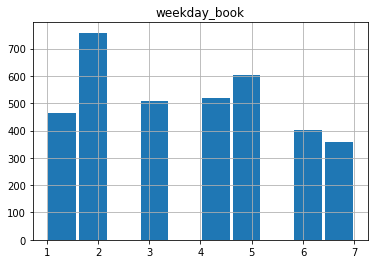

In [1008]:
#What days of the week do diners usually book?

df.hist(column="weekday_book",rwidth=0.9)
df.weekday_book.value_counts()

10.0    347
11.0    306
13.0    269
12.0    247
17.0    213
14.0    209
15.0    206
9.0     200
16.0    199
19.0    183
20.0    180
18.0    180
21.0    162
8.0     125
22.0    112
23.0    110
7.0     104
0.0      96
6.0      51
1.0      38
5.0      24
4.0      20
3.0      17
2.0      15
Name: hour, dtype: int64

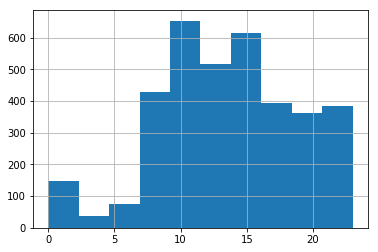

In [965]:
#What times do diners usually book?

df.hour.hist()
df.hour.value_counts()

 28.0     330
 0.0      154
 1.0      151
 3.0      133
-1.0      123
 2.0      123
 7.0      119
 6.0      118
 4.0      113
 27.0     112
 5.0      107
 8.0      104
 24.0      98
 26.0      97
 10.0      94
 14.0      87
 21.0      85
 20.0      85
 12.0      85
 25.0      82
 9.0       81
 23.0      79
 13.0      77
 15.0      76
 22.0      73
 11.0      73
 16.0      72
 17.0      69
 18.0      67
 19.0      61
         ... 
 287.0      1
 293.0      1
 132.0      1
 440.0      1
 488.0      1
 328.0      1
 172.0      1
 376.0      1
 264.0      1
 220.0      1
 156.0      1
 148.0      1
 126.0      1
 69.0       1
 102.0      1
 324.0      1
 457.0      1
 250.0      1
 37.0       1
 118.0      1
 210.0      1
 114.0      1
 93.0       1
 74.0       1
 66.0       1
 197.0      1
 53.0       1
 598.0      1
 317.0      1
 315.0      1
Name: days_before_booked, Length: 318, dtype: int64

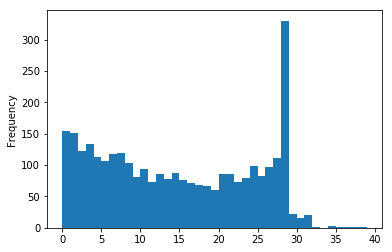

In [762]:
#How far in advance do diners usually book? 
bin_range = [i for i in range(40) if i%1 ==0]
df.days_before_booked.plot(kind='hist',bins=bin_range)
df.days_before_booked.value_counts()


weekday_reservation  days_before_booked
1                     28.0                  2
                      1.0                   1
                      12.0                  1
                      26.0                  1
                      27.0                  1
                      390.0                 1
                      464.0                 1
                      488.0                 1
2                     28.0                 35
                      1.0                  26
                      0.0                  24
                      4.0                  22
                      7.0                  22
                      27.0                 20
                      20.0                 19
                     -1.0                  18
                      3.0                  17
                      10.0                 17
                      12.0                 17
                      13.0                 17
                      2.0               

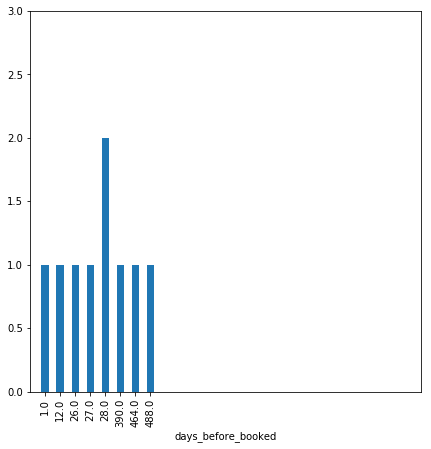

In [837]:
#Does it vary on certain weekdays?
fig, ax = plt.subplots(figsize = [7,7])
daynum = 1
days_before_weekdays = df.groupby("weekday_reservation").days_before_booked.value_counts()
days_before_weekdays[daynum].sort_index().plot(kind="bar")

ax.set_xbound([-1,25])
ax.set_ylim([0,days_before_weekdays[daynum].max()+1])

days_before_weekdays[daynum]
days_before_weekdays

weekday_book
2.0    108
5.0     84
4.0     72
3.0     59
6.0     53
1.0     52
7.0     46
Name: weekday_book, dtype: int64

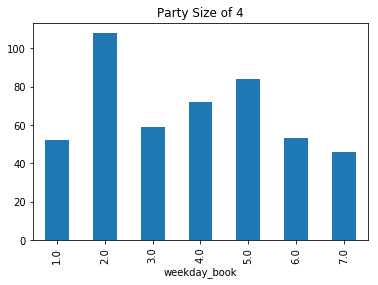

In [1029]:
#Does party size affect booking behaviors or trends?
party_size_weekdays = df.groupby("reservation_party_size").weekday_book.value_counts()
size = 4
party_size_weekdays[size].sort_index().plot(kind="bar",title="Party Size of %s"%(size))
party_size_weekdays[size]

#Affect booking time?
#party_size_time = df.groupby("reservation_party_size").hour.value_counts()
#party_size_time[size].sort_index().plot(kind="bar",title="Party Size of %s"%(size))
#party_size_time[size]


weekday_book
5.0    150
1.0    105
2.0    102
4.0    100
3.0     98
7.0     87
6.0     80
Name: weekday_book, dtype: int64

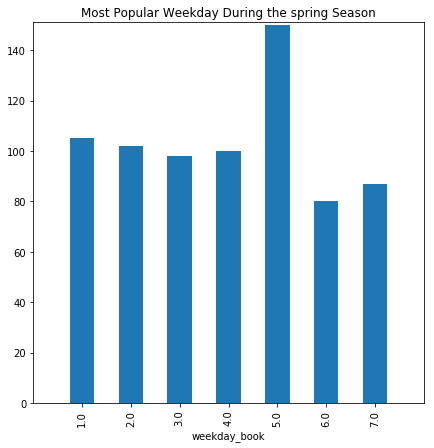

In [1038]:
#Groupby seasons
fig, ax = plt.subplots(figsize = [7,7])
season = "spring"
szn = df.groupby("season").weekday_book.value_counts()
szn[season].sort_index().plot(kind="bar",title="Most Popular Weekday During the %s Season"%(season))

#szn = df.groupby("season").hour.value_counts()
#szn.hist()

ax.set_xbound([-1,7])
ax.set_ylim([0,szn[season].max()+1])

szn[season]